# Gene Promoter Prediction

We have a collection of DNA sequences, labeled as to whether each sequence contains promoter regions or not, and we need to train a model to classify and make predictions for sequences it has never seen before.

We will explore models for classification based on statistical features, hexamers (k-mers with k=6), sequential hexamers, and the original sequential data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import warnings
from Bio import SeqIO
warnings.filterwarnings('ignore')

results = {} #dictionary to store accuracy and f1-score of models

In [2]:
# columns = ['class','id','seq']
# df = pd.read_csv('../input/gene-promoter-sequences/promoters.data',names=columns)
# df.head(2)

Many sequences start with '\t' or '\t\t'. We remove these redundant characters

In [3]:
with open("C:/Users/Admin/Pattern_Project/Promoter_negative2860.fasta") as fasta_file:  # Will close handle cleanly
    identifiers = []
    lengths = []
#read Sequence from FASTA file
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(str(seq_record.seq))
        lengths.append(len(seq_record.seq))

In [4]:
#store sequence in DataFrame
d = {'seq':identifiers,'Len':lengths }
negative_data= pd.DataFrame(d)
negative_data['id']="-"
negative_data

,seq,Len,id
0,CGCAGCGGGTTTACCCTCTGACCGTTTCTGTTACGAAGGCTTTTTA...,81,-
1,TGCTGCTTGGTCTGTGGGTTGCCGCACAGGTTGCCGGTTCCACCAA...,81,-
2,GAATCCAACTTATGTTGTAAACTGGCAAGGTAATGTCATTAGTCAT...,81,-
3,TGGACCTGTTTCGCCGAAACGCGCTGGAAAAAGCGTATCTGGAGAT...,81,-
4,CCGCGACATTGAAAACTGGCCTCATATCAACGGCGTTTTTTATTCC...,81,-
...,...,...,...
2855,CAACCTTTTACCTTAAGGTTCCGGAAGGCTGGTTCATTCCGGCTGA...,81,-
2856,GGGCAGGCAAAAAATCAATCTTGATCCCGATATCGTCCGCGTTGCC...,81,-
2857,TGATTTGTATGGAAAAAATCTATGCCTATGCGGGATATATCGCCAT...,81,-
2858,ACTCAGTCATTCCCGCGCCCGAGGAAGGTGAAACGGCAACGTTTAT...,81,-


In [5]:
with open("C:/Users/Admin/Pattern_Project/Promoter_positive2860.fasta") as fasta_file:  # Will close handle cleanly
    identifiers = []
    lengths = []
#read Sequence from FASTA file
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(str(seq_record.seq))
        lengths.append(len(seq_record.seq))

In [6]:
#store sequence in DataFrame
d= {'seq':identifiers,'Len':lengths}
positive_data= pd.DataFrame(d)
positive_data['id']="+"
positive_data

,seq,Len,id
0,CAACCAGCAAGAGAACATCTGGCCTGCGGGCACCACTGCTACAGTG...,81,+
1,CCGCGACCTTTGCCGCAAGCCTCGGTCTGAAAGTTAACGCCGGACA...,81,+
2,CAAGAGCTGGCGCGTATCGCCAAAGCCGCGACCTTTGCCGCAAGCC...,81,+
3,TAGATGTCCTTGATTAACACCAAAATTAAACCTTTTAAAAACCAGG...,81,+
4,TATTTTATCTACAAAAACTGACTAAATAAAAATTTTTCACTAATTG...,81,+
...,...,...,...
2855,CTCGCTGTATCTCTGATAAAACTTGACTCTGGAGTCGACTCCAGAG...,81,+
2856,ATTGAAGCTGCGACAAGCTGGATTGAGTACCGATTTTTTACGCGGC...,81,+
2857,TATGTAACATAATGCGACCAATAATCGTAATGAATATGAGAAGTGT...,81,+
2858,AATAGCGAGTTAACTTGAAGCAATTTATTTAAAAATGAATTATTAA...,81,+


## Exploratory Analysis

In [7]:
df = positive_data.append(negative_data)
df

,seq,Len,id
0,CAACCAGCAAGAGAACATCTGGCCTGCGGGCACCACTGCTACAGTG...,81,+
1,CCGCGACCTTTGCCGCAAGCCTCGGTCTGAAAGTTAACGCCGGACA...,81,+
2,CAAGAGCTGGCGCGTATCGCCAAAGCCGCGACCTTTGCCGCAAGCC...,81,+
3,TAGATGTCCTTGATTAACACCAAAATTAAACCTTTTAAAAACCAGG...,81,+
4,TATTTTATCTACAAAAACTGACTAAATAAAAATTTTTCACTAATTG...,81,+
...,...,...,...
2855,CAACCTTTTACCTTAAGGTTCCGGAAGGCTGGTTCATTCCGGCTGA...,81,-
2856,GGGCAGGCAAAAAATCAATCTTGATCCCGATATCGTCCGCGTTGCC...,81,-
2857,TGATTTGTATGGAAAAAATCTATGCCTATGCGGGATATATCGCCAT...,81,-
2858,ACTCAGTCATTCCCGCGCCCGAGGAAGGTGAAACGGCAACGTTTAT...,81,-


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5720 entries, 0 to 2859
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   seq     5720 non-null   object
 1   Len     5720 non-null   int64 
 2   id      5720 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.8+ KB


In [9]:
# duplicates = df['seq'].duplicated()
# print(df[duplicates])


In [10]:
# df = df.drop_duplicates(subset='seq', keep='first')
# df.info()

sequence length value counts: 81    5720
Name: lengths, dtype: int64


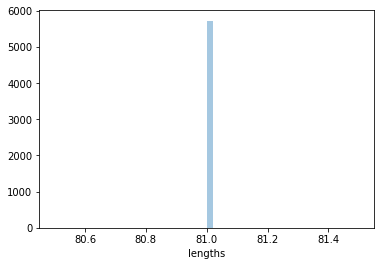

In [11]:
#sequence lengths
lengths = []
for s in df['seq']: lengths.append(len(s))
df['lengths'] = lengths
print('sequence length value counts:', df['lengths'].value_counts())

sns.distplot(df['lengths'],kde=False);

number of classes: 2
class: +    number of values: 2860
class: -    number of values: 2860



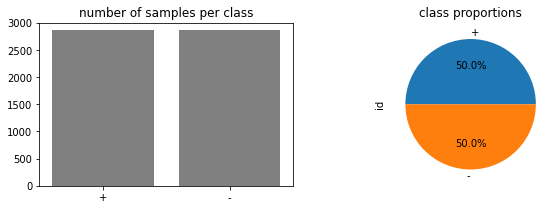

In [12]:
#class proportions
n_classes = df['id'].nunique()
print('number of classes:', n_classes)
label_counts = df['id'].value_counts()
 
for c,v in zip(label_counts.index, label_counts.values):
    print('class: {}    number of values: {}'.format(c,v))    

print('')
plt.figure(figsize=(10,3));
plt.subplot(1,2,1);
sns.barplot(x= label_counts.index, y=label_counts.values, 
            color='Grey');
plt.title('number of samples per class');
plt.subplot(1,2,2);
df['id'].value_counts().plot(kind='pie',autopct='%.1f%%');
plt.title('class proportions');

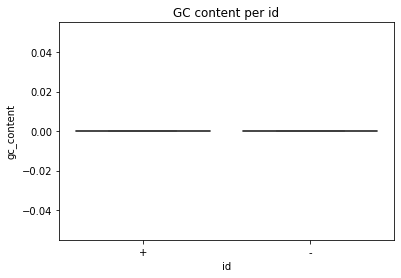

In [13]:
# GC content boxplots

def gc_content (s):
    l = len(s)
    lgc = 0
    for c in s.lower():
        if c in ['C','G']: lgc += 1
    return lgc/l*100

df['gc_content'] = df['seq'].apply(gc_content)

sns.boxplot(x='id',y='gc_content',data=df);
plt.title('GC content per id');

On the above graph we see that the two classes have quite distinct GC contents. Later we will try classifying samples based on GC content alone.

In [14]:
#generate list of codons
alphabet = ['A','C','G','T']
codon_list = []
for a in alphabet:
    for b in alphabet:
        for c in alphabet:
            codon_list.append(a+b+c)

In [15]:
codon_list

['AAA',
 'AAC',
 'AAG',
 'AAT',
 'ACA',
 'ACC',
 'ACG',
 'ACT',
 'AGA',
 'AGC',
 'AGG',
 'AGT',
 'ATA',
 'ATC',
 'ATG',
 'ATT',
 'CAA',
 'CAC',
 'CAG',
 'CAT',
 'CCA',
 'CCC',
 'CCG',
 'CCT',
 'CGA',
 'CGC',
 'CGG',
 'CGT',
 'CTA',
 'CTC',
 'CTG',
 'CTT',
 'GAA',
 'GAC',
 'GAG',
 'GAT',
 'GCA',
 'GCC',
 'GCG',
 'GCT',
 'GGA',
 'GGC',
 'GGG',
 'GGT',
 'GTA',
 'GTC',
 'GTG',
 'GTT',
 'TAA',
 'TAC',
 'TAG',
 'TAT',
 'TCA',
 'TCC',
 'TCG',
 'TCT',
 'TGA',
 'TGC',
 'TGG',
 'TGT',
 'TTA',
 'TTC',
 'TTG',
 'TTT']

In [16]:
# #create dataframe of which and how many codons each sample has

# freqs = []

# for codon in codon_list:
#     for s in df['seq']:
#         freqs.append(s.count(codon))
        
# freqs = np.reshape(np.array(freqs),(df.shape[2],len(codon_list)))
# cf = pd.DataFrame(data=freqs,columns=codon_list,dtype='int')
# cf['label']=df['id']
# cf.head(2)

In [17]:
# #create dataframe with normalized codon frequency for each class
# #will use to make plot

# positives = []
# negatives = []

# for codon in codon_list:
#     positives.append(cf[cf['label'] == '+'][codon].sum()/5720)
#     negatives.append(cf[cf['label'] == '-'][codon].sum()/5720)

# codon_freqs = pd.DataFrame([])
# for c,n,p in zip(codon_list,negatives,positives): codon_freqs[c]=pd.Series([n,p])
# codon_freqs.head()

In [18]:
# # generate plot with codon frequencies for each class

# width = np.sum((cf.groupby(by='label').sum()/5720).values,axis=0).max()
# fig,ax=plt.subplots(figsize=(5,12));
# ax.invert_yaxis();
# ax.xaxis.set_visible(False);
# ax.set_xlim(0,width);
# ax.barh(codon_list,(cf.groupby(by='label').sum()/5720).iloc[0],
#        left=width/2-(cf.groupby(by='label').sum()/5720).iloc[0]);
# ax.barh(codon_list,(cf.groupby(by='label').sum()/5720).iloc[1],
#       left=width/2);
# plt.title('codon frequencies per class');

# Classification on Statistical Features

We will start experimentation by trying out the oldschool technique of classifying based on extracted statistical features.

First, we will only take account of GC content. After trying different threshold value, we found the best value to be 43. Sequences with GC content higher than or equal to 43 will be classified as positive, and the rest as negative. That alone will give us an accuracy of 71.69%, as seen in the cell below

In [19]:
# #classify on gc_content

# from sklearn.preprocessing import LabelEncoder

# lbl = LabelEncoder()
# y = lbl.fit_transform(df['class'].values)

# #classify samples on whether gc_content is aboveor below 43%
# ccs = []
# for i in df['gc_content']:
#     if i < 43: ccs.append(0)
#     else: ccs.append(1)
    
# from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
# print('accuracy:', accuracy_score(y,ccs))
# print('f1-score:', f1_score(y,ccs))
# sns.heatmap(confusion_matrix(y,ccs),annot=True,fmt='1d');

# results['GC_content->thresholding'] = [accuracy_score(y,ccs), f1_score(y,ccs)]

Now we will combine GC content with codon frequencies. We will integrate them into a dataset and train Logistic Regression and Random Forest models on the data.

#### Data Preparation

In [20]:
# # combine codon frequencies and gc_content into a dataframe
# cf['gc_content'] = df['gc_content']
# cf.head(3)

In [21]:
# #libraries and data needed
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


# lab = LabelEncoder()
# y = lab.fit_transform(cf['label'].values)

# x = cf.drop(columns='label').values

# x_tr,x_ts, y_tr, y_ts = train_test_split(x,y,test_size=0.1)

#### Logistic Regression on Statistical Features

In [22]:
# lr = LogisticRegression()
# lr.fit(x_tr,y_tr)
# pred=lr.predict(x_ts)
# print('accuracy:', accuracy_score(y_ts,pred))
# print('f1-score:', f1_score(y_ts,pred))
# sns.heatmap(confusion_matrix(y_ts,pred),annot=True,fmt='1d');

# results['Statistical features -> Logistic Regression'] = [accuracy_score(y_ts,pred), f1_score(y_ts,pred)]

#### Random Forest on Statistical Features

In [23]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=2000,max_depth=7)
# rf.fit(x_tr,y_tr)
# pred = rf.predict(x_ts)
# print('accuracy:', accuracy_score(y_ts,pred))
# print('f1-score:', f1_score(y_ts,pred))
# sns.heatmap(confusion_matrix(y_ts,pred),annot=True,fmt='1d');

# results['Statistical features -> Random Forest'] = [accuracy_score(y_ts,pred), f1_score(y_ts,pred)]

## Classification on Hexamers

Classification on k-mers is also widely used. Here, we will use hexamers (k=6). We will make a list of all the possible hexamers of the characters [a,c,g,t] and we will encode each sequence as a vector of length = n_hexamers where, for each position in the vector, we will assign a value of 1 if the sequence contains that particular hexamer, 0 otherwise.

Notice that this method yields the highest performance on this particular dataset, but this will not always be the case. Experimentation with other methods is necessary, hence, we will later demonstrate classification on two other data representations.

#### Hexamer analysis

In [24]:
#hexamers
alphabet = ['A','C','G','T']
exa_list = []
for a in alphabet:
    for b in alphabet:
        for c in alphabet:
            for d in alphabet:
                for e in alphabet:
                    for f in alphabet:  exa_list.append(a+b+c+d+e+f)

#create arrays for each hexamer, len = n_samples
#if sample x contains hexamer h, then h[x]=1, else 0
exarray = np.zeros((df.shape[0],len(exa_list)),dtype='int')
for i,s in enumerate(df['seq']):
    for j,ex in enumerate(exa_list):
        if ex in s: exarray[i,j] = 1

#merge arrays into a dataframe
examers = pd.DataFrame([])
for i,ex in enumerate(exa_list):
    examers[ex] = pd.Series(exarray[:,i])
    
examers.head(2)

,AAAAAA,AAAAAC,AAAAAG,AAAAAT,AAAACA,AAAACC,AAAACG,AAAACT,AAAAGA,AAAAGC,...,TTTTCG,TTTTCT,TTTTGA,TTTTGC,TTTTGG,TTTTGT,TTTTTA,TTTTTC,TTTTTG,TTTTTT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


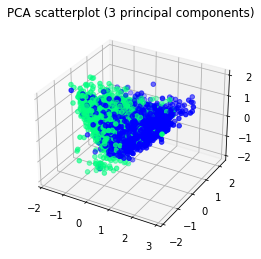

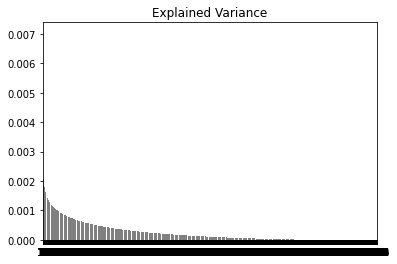

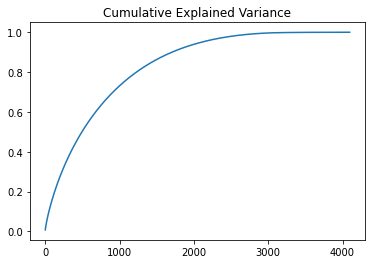

In [25]:
#visualize dataframe with PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


enc = LabelEncoder()
y= enc.fit_transform(df['id'].values)

pca = PCA()
ex_pca = pca.fit_transform(examers.values)

plt.figure();
ax = plt.axes(projection='3d');
ax.scatter(ex_pca[:,0], ex_pca[:,1], ex_pca[:,2], c=y, cmap='winter');
plt.title('PCA scatterplot (3 principal components)');

plt.figure();
var_index = np.arange(pca.explained_variance_.shape[0])+1
sns.barplot(var_index,pca.explained_variance_ratio_,color='gray');
plt.title('Explained Variance');

plt.figure();
sns.lineplot(var_index, pca.explained_variance_ratio_.cumsum());
plt.title('Cumulative Explained Variance');

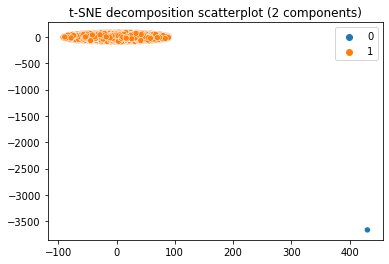

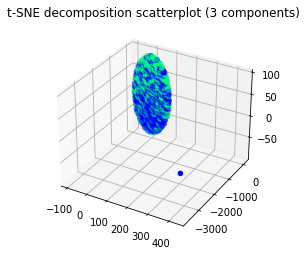

In [26]:
#visualize dataframe with t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=33)
ts_ex = tsne.fit_transform(examers.values)

sns.scatterplot(ts_ex[:,0], ts_ex[:,1],hue=y);
plt.title('t-SNE decomposition scatterplot (2 components)');
plt.figure();
ax = plt.axes(projection='3d');
ax.scatter(ts_ex[:,0], ts_ex[:,1], ts_ex[:,2], c=y, cmap='winter');
plt.title('t-SNE decomposition scatterplot (3 components)');

#### Logistic Regression on Hexamers

accuracy: 0.7307692307692307
f1-score: 0.7169117647058824


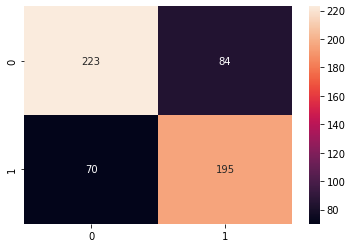

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
x_tr,x_ts,y_tr,y_ts = train_test_split(examers.values, y, test_size=0.1,random_state=33)

lr=LogisticRegression()
lr.fit(x_tr,y_tr)
pred=lr.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,pred))
print('f1-score:', f1_score(y_ts,pred))
sns.heatmap(confusion_matrix(y_ts,pred),annot=True,fmt='1d');

results['Hexamers -> Logistic Regression'] = [accuracy_score(y_ts,pred), f1_score(y_ts,pred)]

#### Logistic Regression on PCA-decomposed Hexamers

accuracy: 0.7972027972027972
f1-score: 0.7928571428571429


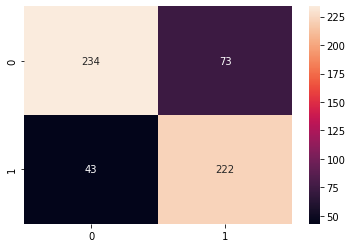

In [28]:
x_pca = ex_pca[:,:40]
x_pca_tr,x_pca_ts,y_tr,y_ts = train_test_split(x_pca, y, test_size=0.1,random_state=33)
lr1=LogisticRegression()
lr1.fit(x_pca_tr,y_tr)
pred=lr1.predict(x_pca_ts)
print('accuracy:', accuracy_score(y_ts,pred))
print('f1-score:', f1_score(y_ts,pred))
sns.heatmap(confusion_matrix(y_ts,pred),annot=True,fmt='1d');

results['PCA-decomposed Hexamers -> Logistic Regression'] = [accuracy_score(y_ts,pred), f1_score(y_ts,pred)]

#### Random Forest on Hexamers

accuracy: 0.8024475524475524
f1-score: 0.7855787476280836


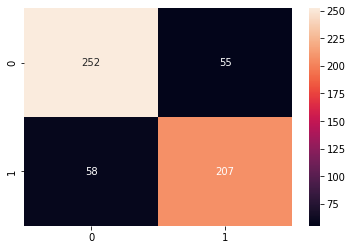

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2000)
rf.fit(x_tr,y_tr)
pred = rf.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,pred))
print('f1-score:', f1_score(y_ts,pred))
sns.heatmap(confusion_matrix(y_ts,pred),annot=True,fmt='1d');

results['Hexamers -> Random Forest'] = [accuracy_score(y_ts,pred), f1_score(y_ts,pred)]

## Classification of Embedded Hexamers

Now we will convert the nucleotide sequences into sequences of hexamers using a 'sliding window', and we will encode these using a keras Embedding layer, then train deep learning models.

In [30]:
#generate matrix with rows=n_samples, columns=len(samples)-6
#hexamers are stored sequentially
for i,seq in enumerate(df['seq']):
    temp=[]
    for j in range(len(seq)-6):
        temp.append(seq[j:j+6])
    if i == 0: hexes = np.array(temp)
    else: hexes = np.vstack((hexes,temp))
        
hexes.shape

(5720, 75)

In [31]:
hexes[0]

array(['CAACCA', 'AACCAG', 'ACCAGC', 'CCAGCA', 'CAGCAA', 'AGCAAG',
       'GCAAGA', 'CAAGAG', 'AAGAGA', 'AGAGAA', 'GAGAAC', 'AGAACA',
       'GAACAT', 'AACATC', 'ACATCT', 'CATCTG', 'ATCTGG', 'TCTGGC',
       'CTGGCC', 'TGGCCT', 'GGCCTG', 'GCCTGC', 'CCTGCG', 'CTGCGG',
       'TGCGGG', 'GCGGGC', 'CGGGCA', 'GGGCAC', 'GGCACC', 'GCACCA',
       'CACCAC', 'ACCACT', 'CCACTG', 'CACTGC', 'ACTGCT', 'CTGCTA',
       'TGCTAC', 'GCTACA', 'CTACAG', 'TACAGT', 'ACAGTG', 'CAGTGG',
       'AGTGGT', 'GTGGTG', 'TGGTGG', 'GGTGGT', 'GTGGTC', 'TGGTCA',
       'GGTCAC', 'GTCACT', 'TCACTG', 'CACTGG', 'ACTGGC', 'CTGGCA',
       'TGGCAA', 'GGCAAA', 'GCAAAC', 'CAAACA', 'AAACAA', 'AACAAG',
       'ACAAGA', 'CAAGAT', 'AAGATC', 'AGATCG', 'GATCGC', 'ATCGCG',
       'TCGCGA', 'CGCGAC', 'GCGACG', 'CGACGA', 'GACGAA', 'ACGAAA',
       'CGAAAG', 'GAAAGC', 'AAAGCC'], dtype='<U6')

In [32]:
# merge each row into a single item, hexamers divided by ' '.
# rows now form a list of len=n_samples
hexamers = [' '.join(hexs) for hexs in hexes]
hexamers[0]

'CAACCA AACCAG ACCAGC CCAGCA CAGCAA AGCAAG GCAAGA CAAGAG AAGAGA AGAGAA GAGAAC AGAACA GAACAT AACATC ACATCT CATCTG ATCTGG TCTGGC CTGGCC TGGCCT GGCCTG GCCTGC CCTGCG CTGCGG TGCGGG GCGGGC CGGGCA GGGCAC GGCACC GCACCA CACCAC ACCACT CCACTG CACTGC ACTGCT CTGCTA TGCTAC GCTACA CTACAG TACAGT ACAGTG CAGTGG AGTGGT GTGGTG TGGTGG GGTGGT GTGGTC TGGTCA GGTCAC GTCACT TCACTG CACTGG ACTGGC CTGGCA TGGCAA GGCAAA GCAAAC CAAACA AAACAA AACAAG ACAAGA CAAGAT AAGATC AGATCG GATCGC ATCGCG TCGCGA CGCGAC GCGACG CGACGA GACGAA ACGAAA CGAAAG GAAAGC AAAGCC'

In [33]:
#tokenize data, prepare train-test set
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

tknizer = Tokenizer()
tknizer.fit_on_texts(hexamers)
tokened = np.array(tknizer.texts_to_sequences(hexamers))
index_length = len(tknizer.word_index) + 1
print('tokenizer index length:', index_length)

lab = LabelEncoder()
y = lab.fit_transform(df['id'].values)

x_tr, x_ts, y_tr, y_ts = train_test_split(tokened,y,
                                         test_size=0.1,random_state=33)

tokenizer index length: 4095


#### Bidirectional LSTM on Sequential Embedded Hexamers

In [34]:
from keras import models
from keras import layers
from keras.optimizers import Adam,RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

model = models.Sequential()
model.add(layers.Embedding(index_length,10))
model.add(layers.Bidirectional(layers.LSTM(10)))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['acc'])

model.fit(x_tr,y_tr,epochs=10,verbose=1,validation_split=0.1)

Epoch 1/10
145/145 [==============================] - 7s 15ms/step - loss: 0.5845 - acc: 0.6924 - val_loss: 0.4411 - val_acc: 0.8058
Epoch 2/10
145/145 [==============================] - 2s 11ms/step - loss: 0.4048 - acc: 0.8368 - val_loss: 0.4276 - val_acc: 0.8252
Epoch 3/10
145/145 [==============================] - 2s 11ms/step - loss: 0.3345 - acc: 0.8744 - val_loss: 0.5076 - val_acc: 0.7961
Epoch 4/10
145/145 [==============================] - 2s 11ms/step - loss: 0.2858 - acc: 0.9018 - val_loss: 0.4883 - val_acc: 0.8019
Epoch 5/10
145/145 [==============================] - 2s 11ms/step - loss: 0.2456 - acc: 0.9191 - val_loss: 0.5632 - val_acc: 0.7825
Epoch 6/10
145/145 [==============================] - 2s 11ms/step - loss: 0.2148 - acc: 0.9329 - val_loss: 0.5826 - val_acc: 0.7825
Epoch 7/10
145/145 [==============================] - 2s 11ms/step - loss: 0.1888 - acc: 0.9432 - val_loss: 0.6379 - val_acc: 0.7883
Epoch 8/10
145/145 [==============================] - 2s 11ms/step - 

18/18 [==============================] - 1s 3ms/step
accuracy: 0.7342657342657343
f1-score: 0.7314487632508834


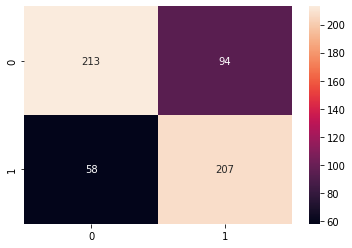

In [35]:
preds = []
for p in model.predict(x_ts):
    if p<0.5: preds.append(0)
    else: preds.append(1)

print('accuracy:', accuracy_score(y_ts,preds))
print('f1-score:', f1_score(y_ts,preds))
sns.heatmap(confusion_matrix(y_ts,preds),annot=True,fmt='1d');

results['Sequential Embedded Hexamers -> Bidirectional LSTM'] = [accuracy_score(y_ts,preds), f1_score(y_ts,preds)]

#### CNN on Sequential Embedded Hexamers

In [36]:
model = models.Sequential()
model.add(layers.Embedding(index_length,10))
model.add(layers.Conv1D(16,10,activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

model.fit(x_tr,y_tr,epochs=10,verbose=0,validation_split=0.1)

18/18 [==============================] - 0s 1ms/step
accuracy: 0.7604895104895105
f1-score: 0.7575221238938054


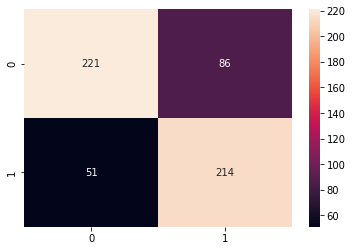

In [37]:
preds = []
for p in model.predict(x_ts):
    if p<0.5: preds.append(0)
    else: preds.append(1)

print('accuracy:', accuracy_score(y_ts,preds))
print('f1-score:', f1_score(y_ts,preds))
sns.heatmap(confusion_matrix(y_ts,preds),annot=True,fmt='1d');

results['Sequential Embedded Hexamers -> CNN'] = [accuracy_score(y_ts,preds), f1_score(y_ts,preds)]

## Classification on sequential data

Lastly, we will train models on the nucleotide sequences themselves.


We try traditional machine learning models, namely Logistic Regression and Random Forest on ordinally encoded sequences, and then deep learning models on one-hot encoded sequences.

### Ordinal-encoded Sequences

In [38]:
#ordinal encoding
x = np.zeros((5720,2860))
for i,s in enumerate(df['seq']):
    for j,c in enumerate(s):
        if c == 'A': x[i,j] = 0.25
        elif c == 'C': x[i,j] = 0.50
        elif c == 'G': x[i,j] = 0.75
        else: x[i,j] = 1
            
x.shape,x[0,:4]

((5720, 2860), array([0.5 , 0.25, 0.25, 0.5 ]))

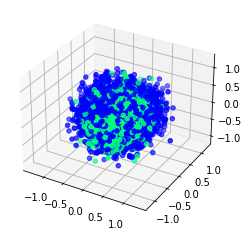

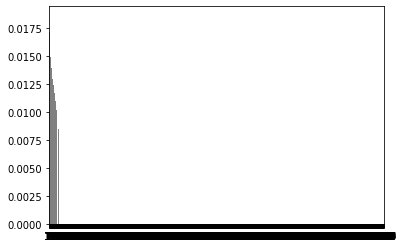

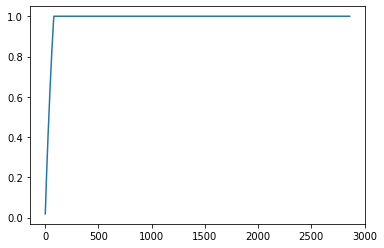

In [39]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(x)

plt.figure();
ax = plt.axes(projection='3d');
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=y, cmap='winter');

plt.figure();
var_index = np.arange(pca.explained_variance_.shape[0])+1
sns.barplot(var_index,pca.explained_variance_ratio_,color='gray');

plt.figure();
sns.lineplot(var_index, pca.explained_variance_ratio_.cumsum());

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

enc = LabelEncoder()
y= enc.fit_transform(df['id'].values)

x_tr,x_ts, y_tr, y_ts = train_test_split(x,y,test_size=0.2,
                                         random_state=42)
x_tr.shape, y_tr.shape, x_ts.shape, y_ts.shape

((4576, 2860), (4576,), (1144, 2860), (1144,))

#### Logistic Regression on sequential data

accuracy: 0.6398601398601399
f1-score: 0.6379613356766255


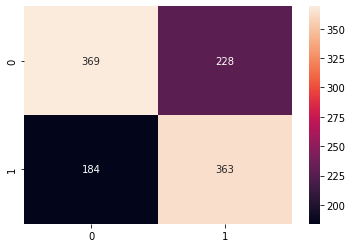

In [41]:
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
pred = logreg.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,pred))
print('f1-score:', f1_score(y_ts,pred))
sns.heatmap(confusion_matrix(y_ts,pred),annot=True,fmt='1d');

results['Sequential Ordinal_Encoded -> Logistic Regression'] = [accuracy_score(y_ts,pred), f1_score(y_ts,pred)]

#### Random Forest on sequential data

accuracy: 0.8155594405594405
f1-score: 0.8166811468288445


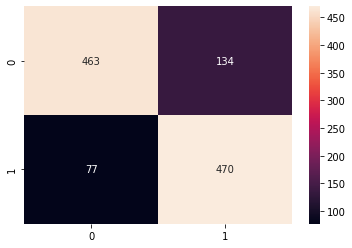

In [42]:
rf = RandomForestClassifier(n_estimators=2000)
rf.fit(x_tr,y_tr)
pred = rf.predict(x_ts)
print('accuracy:', accuracy_score(y_ts,pred))
print('f1-score:', f1_score(y_ts,pred))
sns.heatmap(confusion_matrix(y_ts,pred),annot=True,fmt='1d');

results['Sequential Ordinal_Encoded -> Random Forest'] = [accuracy_score(y_ts,pred), f1_score(y_ts,pred)]

### OneHot-encoded Sequences

In [43]:
#onehot encoding
x_onehot = np.zeros((5720,4,2860),dtype='int')
for i,s in enumerate(df['seq']):
    for j,c in enumerate(s):
        if c == 'A': x_onehot[i,0,j] = 1
        elif c == 'C': x_onehot[i,1,j] = 1
        elif c == 'G': x_onehot[i,2,j] = 1
        else: x_onehot[i,3,j] = 1
            
            
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

enc = LabelEncoder()
y= enc.fit_transform(df['id'].values)

x_tr,x_ts, y_tr, y_ts = train_test_split(x_onehot,y,test_size=0.2,
                                         random_state=42)
x_tr.shape, y_tr.shape, x_ts.shape, y_ts.shape

((4576, 4, 2860), (4576,), (1144, 4, 2860), (1144,))

#### Convolutional Neural Network on sequential data

In [44]:
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [45]:
model = models.Sequential()
model.add(layers.Conv1D(256,12,activation='relu',
                        input_shape=(x_tr.shape[1],x_tr.shape[2]),
                        padding='same'))
model.add(layers.Dropout(0.1))
#model.add(layers.GlobalMaxPooling1D())
model.add(layers.MaxPool1D(10,padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])


stop = EarlyStopping(patience=4,verbose=1)
model.fit(x_tr,y_tr,epochs=15, validation_split=0.1,verbose=2,callbacks=[stop])

Epoch 1/15
129/129 - 1s - loss: 0.4731 - acc: 0.7715 - val_loss: 0.4184 - val_acc: 0.8144 - 1s/epoch - 10ms/step
Epoch 2/15
129/129 - 1s - loss: 0.3592 - acc: 0.8405 - val_loss: 0.4375 - val_acc: 0.7991 - 670ms/epoch - 5ms/step
Epoch 3/15
129/129 - 1s - loss: 0.2871 - acc: 0.8827 - val_loss: 0.4325 - val_acc: 0.8231 - 673ms/epoch - 5ms/step
Epoch 4/15
129/129 - 1s - loss: 0.1732 - acc: 0.9398 - val_loss: 0.4806 - val_acc: 0.8231 - 671ms/epoch - 5ms/step
Epoch 5/15
129/129 - 1s - loss: 0.0727 - acc: 0.9798 - val_loss: 0.5652 - val_acc: 0.8253 - 671ms/epoch - 5ms/step
Epoch 5: early stopping


36/36 [==============================] - 0s 2ms/step
accuracy: 0.8382867132867133
f1-score: 0.8288621646623497


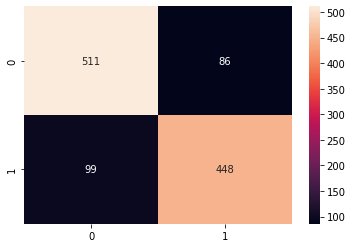

In [46]:
preds = []
for p in model.predict(x_ts):
    if p<0.5: preds.append(0)
    else: preds.append(1)

print('accuracy:', accuracy_score(y_ts,preds))
print('f1-score:', f1_score(y_ts,preds))
sns.heatmap(confusion_matrix(y_ts,preds),annot=True,fmt='1d');

results['One-hot Sequential  -> CNN'] = [accuracy_score(y_ts,preds), f1_score(y_ts,preds)]

#### Recurent Neural Network (Bidirectional LSTM) on sequential data

In [47]:
from keras.optimizers import RMSprop
rnn = models.Sequential()
rnn.add(layers.Bidirectional(layers.LSTM(50,return_sequences=True),
        input_shape=(x_tr.shape[2],x_tr.shape[1])))
rnn.add(layers.Bidirectional(layers.LSTM(50,return_sequences=True,recurrent_dropout=0.1)))
rnn.add(layers.Bidirectional(layers.LSTM(50)))
rnn.add(layers.Dense(64,activation='relu'))
rnn.add(layers.Dense(1,activation='sigmoid'))

rnn.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['acc'])
rnn.fit(np.swapaxes(x_tr,2,1),y_tr,epochs=5,validation_split=0.1,verbose=1)

Epoch 1/5
129/129 [==============================] - 3408s 26s/step - loss: 0.5611 - acc: 0.7258 - val_loss: 0.5529 - val_acc: 0.7576
Epoch 2/5
129/129 [==============================] - 3381s 26s/step - loss: 0.5223 - acc: 0.7586 - val_loss: 0.5131 - val_acc: 0.7620
Epoch 3/5
129/129 [==============================] - 3413s 26s/step - loss: 0.5222 - acc: 0.7591 - val_loss: 0.5003 - val_acc: 0.7817
Epoch 4/5
129/129 [==============================] - 3346s 26s/step - loss: 0.5205 - acc: 0.7603 - val_loss: 0.5164 - val_acc: 0.7707
Epoch 5/5
129/129 [==============================] - 3374s 26s/step - loss: 0.5177 - acc: 0.7615 - val_loss: 0.5293 - val_acc: 0.7751


36/36 [==============================] - 151s 4s/step
accuracy: 0.7718531468531469
f1-score: 0.7558465855940131


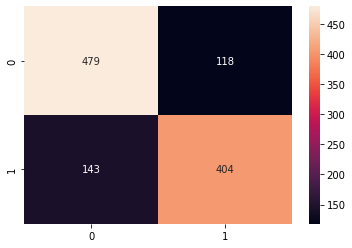

In [48]:
preds = []
for p in rnn.predict(np.swapaxes(x_ts,2,1)):
    if p<0.5: preds.append(0)
    else: preds.append(1)

print('accuracy:', accuracy_score(y_ts,preds))
print('f1-score:', f1_score(y_ts,preds))
sns.heatmap(confusion_matrix(y_ts,preds),annot=True,fmt='1d');

results['One-hot Sequential  -> Bidirectional LSTM'] = [accuracy_score(y_ts,preds), f1_score(y_ts,preds)]

#### CNN/LSTM hybrid on sequential data

In [49]:
hyb = models.Sequential()
hyb.add(layers.Conv1D(256,12,activation='relu',padding='same',
                      input_shape=(x_tr.shape[1],x_tr.shape[2])))
hyb.add(layers.MaxPool1D(8,padding='same'))
#hyb.add(layers.Flatten())
hyb.add(layers.Bidirectional(layers.LSTM(40)))
hyb.add(layers.Dense(1,activation='sigmoid'))

hyb.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['acc'])
hyb.fit(x_tr,y_tr,epochs=15, validation_split=0.1,verbose=0)

36/36 [==============================] - 1s 3ms/step
accuracy: 0.840034965034965
f1-score: 0.8307123034227567


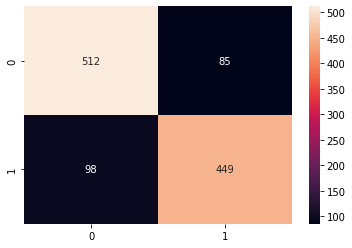

In [50]:
preds = []
for p in hyb.predict(x_ts):
    if p<0.5: preds.append(0)
    else: preds.append(1)

print('accuracy:', accuracy_score(y_ts,preds))
print('f1-score:', f1_score(y_ts,preds))
sns.heatmap(confusion_matrix(y_ts,preds),annot=True,fmt='1d');

results['One-hot Sequential  -> CNN\Bi-LSTM'] = [accuracy_score(y_ts,preds), f1_score(y_ts,preds)]

# Comparative Results

In [51]:
#display performance of models in a dataframe 
pd.DataFrame(data=results.values(),index=results.keys(),columns=['accuracy','f1-score'])

,accuracy,f1-score
Hexamers -> Logistic Regression,0.730769,0.716912
PCA-decomposed Hexamers -> Logistic Regression,0.797203,0.792857
Hexamers -> Random Forest,0.802448,0.785579
Sequential Embedded Hexamers -> Bidirectional LSTM,0.734266,0.731449
Sequential Embedded Hexamers -> CNN,0.760490,0.757522
Sequential Ordinal_Encoded -> Logistic Regression,0.639860,0.637961
Sequential Ordinal_Encoded -> Random Forest,0.815559,0.816681
One-hot Sequential -> CNN,0.838287,0.828862
One-hot Sequential -> Bidirectional LSTM,0.771853,0.755847
One-hot Sequential -> CNN\Bi-LSTM,0.840035,0.830712


TypeError: tight_layout() takes 0 positional arguments but 1 was given

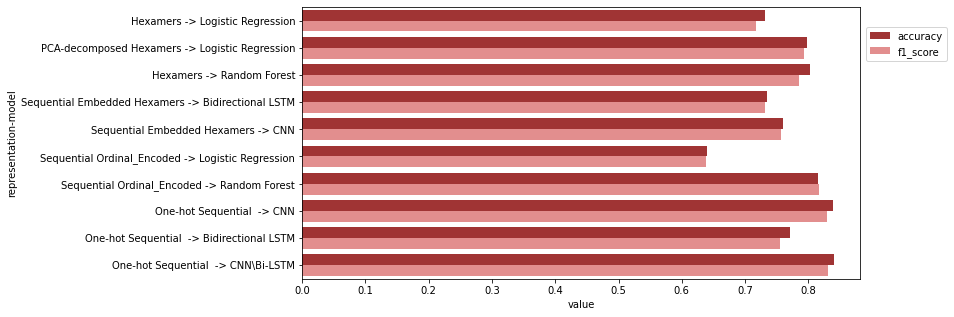

In [52]:
#comparison visualization

#prepare the results-data for barplot
models = list(results.keys())
accuracies = [results[m][0] for m in models]
f1_scores = [results[m][1] for m in models]
ml_models = pd.Series(np.hstack((models,models)))
value = pd.Series(np.hstack((accuracies,f1_scores)))
metric = pd.Series(np.repeat(['accuracy','f1_score'],len(models)))
results_df = pd.DataFrame([])
results_df['representation-model'] = ml_models
results_df['value'] = value
results_df['metric'] = metric

#generate barplot
plt.figure(figsize=(10,5));
sns.barplot(y='representation-model', x='value', data=results_df, 
            hue='metric',palette=['firebrick','lightcoral']);
plt.legend(loc=(1.01,0.8));
plt.tight_layout(True);
plt.title('Model Performance');

#### Note

The particular dataset consisted of very few samples of short sequences. As the number of samples and the length of the sequences increases, classifying based on the sequences, as opposed to k-mers, becomes a better option. Also, with big data, deep learning increasingly supersedes conventional machine learning models.